In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
sample_submission = pd.read_csv("E:\\Downloads\\sample_submission_blackfriday.csv")

In [3]:
sample_submission.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [4]:
sample_submission.shape

(233599, 3)

In [5]:
train = pd.read_csv("E:\\Downloads\\train_blackfriday\\train.csv")
test = pd.read_csv("E:\\Downloads\\test_blackfriday\\test.csv")

In [6]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [10]:
train.columns.difference(test.columns)

Index(['Purchase'], dtype='object')

In [11]:
train['source'] = 'train'
test['source'] = 'test'

In [12]:
train[:3]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,train


In [13]:
test[:3]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,source
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,test
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,test
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,test


In [14]:
#concatenate both train & test dataset into one
df = pd.concat([train,test])
df[:3]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train


In [15]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [16]:
df['Product_Category_3']. isna(). sum() * 100 / len(df['Product_Category_3'])

69.64807756355697

In [17]:
#dropping the column since null values are high
df.drop(columns = ['Product_Category_3'],inplace = True)

In [18]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,23961.000000


In [19]:
#fetch numerical and categorical columns separately.
numerical_columns = df.select_dtypes(include=np.number).drop(columns = ['Purchase'])
categorical_columns = df.select_dtypes(exclude = np.number).columns

In [20]:
numerical_columns

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2
0,1000001,10,0,3,NaN
1,1000001,10,0,1,6.0
2,1000001,10,0,12,NaN
3,1000001,10,0,12,14.0
4,1000002,16,0,8,NaN
...,...,...,...,...,...
233594,1006036,15,1,8,NaN
233595,1006036,15,1,5,8.0
233596,1006036,15,1,1,5.0
233597,1006037,1,0,10,16.0


In [21]:
#find the unique values in categorical columns
df[categorical_columns].apply(lambda x : x.nunique())

Product_ID                    3677
Gender                           2
Age                              7
City_Category                    3
Stay_In_Current_City_Years       5
source                           2
dtype: int64

In [22]:
#fetch the value counts of each categorical column
df[categorical_columns].apply(lambda x: print(x.value_counts()))

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00075042       1
P00063742       1
P00204642       1
P00253842       1
P00053242       1
Name: Product_ID, Length: 3677, dtype: int64
M    590031
F    193636
Name: Gender, dtype: int64
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64
train    550068
test     233599
Name: source, dtype: int64


Product_ID                    None
Gender                        None
Age                           None
City_Category                 None
Stay_In_Current_City_Years    None
source                        None
dtype: object

In [23]:
#minimize the cardinality
df['Product_ID_4'] = df['Product_ID'].apply(lambda x: x[0:4])

In [24]:
df['Product_ID_4'].value_counts()

P001    265607
P002    201616
P000    188958
P003    114165
P009     13321
Name: Product_ID_4, dtype: int64

In [23]:
df.groupby(['Product_ID_4','Product_Category_2']).count()

User_ID  Product_ID  Gender    Age  \
Product_ID_4 Product_Category_2                                       
P000         2.0                   20935       20935   20935  20935   
             3.0                     451         451     451    451   
             4.0                   11105       11105   11105  11105   
             5.0                    9069        9069    9069   9069   
             6.0                    6250        6250    6250   6250   
...                                  ...         ...     ...    ...   
P009         8.0                    1495        1495    1495   1495   
             12.0                    368         368     368    368   
             14.0                    516         516     516    516   
             15.0                    488         488     488    488   
             16.0                   1810        1810    1810   1810   

                                 Occupation  City_Category  \
Product_ID_4 Product_Category_2                              
P000         2.0                      20935          20935   
             3.0                        451            451   
             4.0                      11105          11105   
             5.0                       9069           9069   
             6.0                       6250           6250   
...                                     ...            ...   
P009         8.0                       1495           1495   
             12.0                       368            368   
             14.0                       516            516   
             15.0                       488            488   
             16.0                      1810           1810   

                                 Stay_In_Current_City_Years  Marital_Status  \
Product_ID_4 Product_Category_2                                               
P000         2.0                                      20935           20935   
             3.0                                        451             451   
             4.0                                      11105           11105   
             5.0                                       9069            9069   
             6.0                                       6250            6250   
...                                                     ...             ...   
P009         8.0                                       1495            1495   
             12.0                                       368             368   
             14.0                                       516             516   
             15.0                                       488             488   
             16.0                                      1810            1810   

                                 Product_Category_1  Purchase  source  
Product_ID_4 Product_Category_2                                        
P000         2.0                              20935     14673   20935  
             3.0                                451       313     451  
             4.0                              11105      7759   11105  
             5.0                               9069      6372    9069  
             6.0                               6250      4349    6250  
...                                             ...       ...     ...  
P009         8.0                               1495      1062    1495  
             12.0                               368       260     368  
             14.0                               516       362     516  
             15.0                               488       364     488  
             16.0                              1810      1268    1810  

[76 rows x 11 columns]

In [24]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,source,Product_ID_4
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370.0,train,P000
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.0,train,P002
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422.0,train,P000
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.0,train,P000
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969.0,train,P002


In [25]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Purchase                      233599
source                             0
Product_ID_4                       0
dtype: int64

In [25]:
#FILL THE NULL VALUES WITH THE MEAN VALUE
df['Product_Category_2'] = df['Product_Category_2'].transform(lambda x: x.fillna(x.mean()))

In [26]:
df['Product_Category_2'].mean()

9.844505611973885

In [27]:
#replacing range with numbers
df['Age'] = df['Age'].replace({"0-17":'1','18-25':'1','26-35':'1','36-45':'2','46-50':'2','51-55':'2','55+':'3'})

In [28]:
df['Age'].value_counts()

1    476302
2    276786
3     30579
Name: Age, dtype: int64

In [30]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Purchase                      233599
source                             0
Product_ID_4                       0
dtype: int64

<AxesSubplot:>

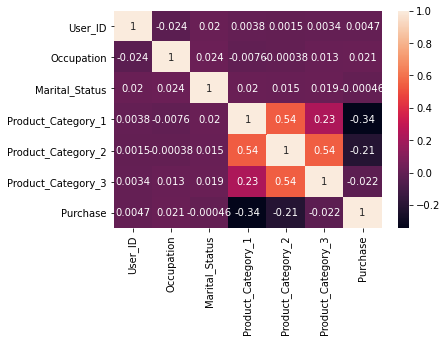

In [33]:
corr_ = train.corr()
sns.heatmap(corr_,annot = True)

In [34]:
df.groupby(by=['City_Category','Stay_In_Current_City_Years'])['City_Category'].count()

City_Category  Stay_In_Current_City_Years
A              0                              34381
               1                              70258
               2                              38653
               3                              35323
               4+                             31629
B              0                              40810
               1                             119117
               2                              59726
               3                              60686
               4+                             49400
C              0                              30525
               1                              87050
               2                              47048
               3                              39419
               4+                             39642
Name: City_Category, dtype: int64

In [31]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace({"4+":'4'})

In [29]:
X = df.select_dtypes(include=np.number).drop(columns = ['Purchase'])
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data

,features
0,User_ID
1,Occupation
2,Marital_Status
3,Product_Category_1
4,Product_Category_2


In [30]:
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data
#since no VIF value is >10 no need to drop any

,features,VIF
0,User_ID,8.874106
1,Occupation,2.535825
2,Marital_Status,1.696059
3,Product_Category_1,3.406601
4,Product_Category_2,7.541280


In [34]:
df_numbers = df.select_dtypes(include=np.number).drop(columns = ['User_ID'])
df_categories = df.select_dtypes(exclude = np.number).drop(columns = ['Product_ID','source'])
#encode the categorical columns
df_categories_encoded = pd.get_dummies(df_categories,drop_first = True)
df_final = pd.concat([df_numbers,df_categories_encoded,df[['User_ID','Product_ID','source']]],axis = 1)
df_final.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_M,Age_2,Age_3,City_Category_B,City_Category_C,...,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Product_ID_4_P001,Product_ID_4_P002,Product_ID_4_P003,Product_ID_4_P009,User_ID,Product_ID,source
0,10,0,3,9.844506,8370.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1000001,P00069042,train
1,10,0,1,6.000000,15200.0,0,0,0,0,0,...,1,0,0,0,1,0,0,1000001,P00248942,train
2,10,0,12,9.844506,1422.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1000001,P00087842,train
3,10,0,12,14.000000,1057.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1000001,P00085442,train
4,16,0,8,9.844506,7969.0,1,0,1,0,1,...,0,0,1,0,1,0,0,1000002,P00285442,train


In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Occupation                     783667 non-null  int64  
 1   Marital_Status                 783667 non-null  int64  
 2   Product_Category_1             783667 non-null  int64  
 3   Product_Category_2             783667 non-null  float64
 4   Purchase                       550068 non-null  float64
 5   Gender_M                       783667 non-null  uint8  
 6   Age_2                          783667 non-null  uint8  
 7   Age_3                          783667 non-null  uint8  
 8   City_Category_B                783667 non-null  uint8  
 9   City_Category_C                783667 non-null  uint8  
 10  Stay_In_Current_City_Years_1   783667 non-null  uint8  
 11  Stay_In_Current_City_Years_2   783667 non-null  uint8  
 12  Stay_In_Current_City_Years_3  

In [43]:
#export the preprocessed data
#df_final.to_excel("E:\\Downloads\\BlackFriday_Pre_processed_data.xlsx",index = False)

In [36]:
df_final.shape

(783667, 21)

In [39]:
#import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [37]:
df_processed = df_final

In [38]:
df_processed.shape

(783667, 21)

In [41]:
df_processed.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_F,Gender_M,Age_1,Age_2,Age_3,...,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Product_ID_4_P000,Product_ID_4_P001,Product_ID_4_P002,Product_ID_4_P003,Product_ID_4_P009,User_ID,Product_ID,source
0,10,0,3,9.844506,8370.0,1,0,1,0,0,...,0,0,1,0,0,0,0,1000001,P00069042,train
1,10,0,1,6.000000,15200.0,1,0,1,0,0,...,0,0,0,0,1,0,0,1000001,P00248942,train
2,10,0,12,9.844506,1422.0,1,0,1,0,0,...,0,0,1,0,0,0,0,1000001,P00087842,train
3,10,0,12,14.000000,1057.0,1,0,1,0,0,...,0,0,1,0,0,0,0,1000001,P00085442,train
4,16,0,8,9.844506,7969.0,0,1,0,0,1,...,0,1,0,0,1,0,0,1000002,P00285442,train


In [63]:
df_processed.shape

(783667, 26)

In [43]:
#fetch train & test data
train_preprocessed = df_processed.loc[df_processed['source']=='train']
test_preprocessed = df_processed.loc[df_processed['source']=='test']

In [64]:
train_preprocessed.shape,test_preprocessed.shape

((550068, 25), (233599, 25))

In [47]:
del train_preprocessed['source']

In [48]:
del test_preprocessed['source']

In [50]:
#exclude the columns shown in sample submission
X_train = train_preprocessed.drop(columns = ['User_ID','Product_ID','Purchase'])
X_test = test_preprocessed.drop(columns = ['User_ID','Product_ID','Purchase'])
# fetch the target prediction
train_y = train_preprocessed['Purchase']
test_y = test_preprocessed['Purchase']

In [51]:
#Using Linear Regression, calculate the MAE,MSE,RMSE & R Squared value
lr = LinearRegression()
lr.fit(X_train,train_y)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
pred_test = abs(pred_test)
print("MAE: ",mean_absolute_error(train_y,pred_train))
print("MSE: ",mean_squared_error(train_y,pred_train))
print("RMSE: ",np.sqrt(mean_squared_error(train_y,pred_train)))
print("R-Squared: ",r2_score(train_y,pred_train))

MAE:  3576.2530441690847
MSE:  21825799.874903195
RMSE:  4671.809058052693
R-Squared:  0.13496576831241203


In [52]:
submission = pd.read_csv("E:\\Downloads\\sample_submission_blackfriday.csv")

In [53]:
submission['Purchase'] = pred_test

In [56]:
#export the submission as a csv file
submission.to_csv("E:\\Downloads\\Submission_Aswin_BlackFriday_LinearReg.csv",index = False)

In [65]:
df_final.isna().sum()

Occupation                           0
Marital_Status                       0
Product_Category_1                   0
Product_Category_2                   0
Purchase                        233599
Gender_F                             0
Gender_M                             0
Age_1                                0
Age_2                                0
Age_3                                0
City_Category_A                      0
City_Category_B                      0
City_Category_C                      0
Stay_In_Current_City_Years_0         0
Stay_In_Current_City_Years_1         0
Stay_In_Current_City_Years_2         0
Stay_In_Current_City_Years_3         0
Stay_In_Current_City_Years_4         0
Product_ID_4_P000                    0
Product_ID_4_P001                    0
Product_ID_4_P002                    0
Product_ID_4_P003                    0
Product_ID_4_P009                    0
User_ID                              0
Product_ID                           0
source                   

In [39]:
train_df = df_processed.loc[df_processed['Purchase'].isna()==False].drop(columns=['Product_ID','source'])
test_df = df_processed.loc[df_processed['Purchase'].isna()==True].drop(columns=['Product_ID','source'])


X_main_test = test_df.drop(['Purchase'],axis = 1)

In [86]:
train_df

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_F,Gender_M,Age_1,Age_2,Age_3,...,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Product_ID_4_P000,Product_ID_4_P001,Product_ID_4_P002,Product_ID_4_P003,Product_ID_4_P009,User_ID
0,10,0,3,9.844506,8370.0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1000001
1,10,0,1,6.000000,15200.0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1000001
2,10,0,12,9.844506,1422.0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1000001
3,10,0,12,14.000000,1057.0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1000001
4,16,0,8,9.844506,7969.0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,9.844506,368.0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1006033
550064,1,0,20,9.844506,371.0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1006035
550065,15,1,20,9.844506,137.0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1006036
550066,1,0,20,9.844506,365.0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1006038


In [40]:
X = train_df.drop(['Purchase'],axis = 1)
y = train_df['Purchase']

In [41]:
from sklearn.model_selection import train_test_split,cross_validate
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2,random_state=2)

In [42]:
#feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)
X_main_test_sc = sc.transform(X_main_test)

In [83]:
train_x

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_1,Age_2,Age_3,City_Category_A,...,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Product_ID_4_P000,Product_ID_4_P001,Product_ID_4_P002,Product_ID_4_P003,Product_ID_4_P009,User_ID,Product_ID,source
456608,16,0,8,17.000000,0,1,0,1,0,1,...,0,0,0,0,0,1,0,1004277,P00311642,train
306321,12,0,8,12.000000,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1005186,P00120742,train
123945,20,1,12,14.000000,0,1,1,0,0,0,...,1,0,1,0,0,0,0,1001147,P00083942,train
430539,4,0,6,16.000000,0,1,1,0,0,1,...,0,1,0,0,1,0,0,1000274,P00240442,train
292222,0,0,8,9.844506,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1003067,P00003642,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53922,12,1,5,9.844506,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1002203,P00282642,train
84434,7,0,1,15.000000,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1001063,P00233542,train
437782,7,0,1,8.000000,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1001383,P00177542,train
203245,17,1,10,15.000000,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1001358,P00159542,train


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#train_model 
KNN = KNeighborsClassifier().fit(train_x,train_y)

pred_y_0 = KNN.predict(test_x)
score = accuracy_score(pred_y_0,test_y)
score = score*100

In [44]:
score

0.06817314160015998

In [99]:
train_x.shape

(440054, 23)

In [98]:
test_x.shape

(110014, 23)

In [45]:
pred_test = KNN.predict(X_main_test_sc)

In [47]:
submission = pd.read_csv("E:\\Downloads\\sample_submission_blackfriday.csv")
submission['Purchase'] = pred_test
submission.to_csv("E:\\Downloads\\submission_BlackFriday_KNN.csv",index = False)